<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 3: Practical - Multi-Layer Perceptron (VAE) <br>
<font color=696880 size=4>
    Sobhan Moghimi (sobhanmoghimi45@gmail.com) <br>
    Fakhredin Abdi (fakhredinabdi80@gmail.com) <br>
    
____


# Description

**In this assignment you'll be working with Dorothea Dataset.**

DOROTHEA is a drug discovery dataset. Chemical compounds represented by structural molecular features must be classified as active (binding to thrombin) or inactive.
To find out more about dataset, refer to this link: https://archive.ics.uci.edu/ml/datasets/Dorothea

You should implement a classifier with Neural Networks and for this purpose we will be using PyTorch as framework.

# Importing libraries, modules and Dataset.

In this part, import all the libraries and modules needed to solve the problem.

In [ ]:
import os
import random
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import itertools
import scipy.sparse as ss
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.decomposition import PCA
from sklearn import preprocessing

Now import the train and test data from dataset.

In [ ]:
# Your code here

def D_data_loader(filename):
    f = open(filename)
    I,J = [],[]
    for k in range(100000):
        line = f.readline()
        if len(line) == 0:
            break
        line = [int(x) for x in line.split()]
        J.extend(line)
        I.extend(k for i in range(len(line)))

    return ss.coo_matrix((np.ones(len(I)), (I,J)))


def D_label_loader(filename):
    f = open(filename)
    y = []
    for k in range(100000):
        line = f.readline()
        if len(line) == 0:
            break
        y.append(int(line))
    y = [0 if val == -1 else 1 for val in y] #change the -1, 1 labels to 0, 1
    return np.array(y)

X_train = D_data_loader('/content/dorothea_train.data')
y_train = D_label_loader('/content/dorothea_train.labels')

X_test= D_data_loader('/content/dorothea_valid.data')
y_test = D_label_loader('/content/dorothea_valid.labels')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 100001) (350, 100001) (800,) (350,)


In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()
X_test.shape, X_train.shape

((350, 100001), (800, 100001))

In [ ]:
#y_train = torch.from_numpy(y_train)
#y_train[0]
#X_train = torch.from_numpy(X_train)
#X_train[0]

## Normalize
You can normalize your data using <code>Scikit-Learn</code> modules here.

In [ ]:
# Apply normalization here
StandardScaler = preprocessing.StandardScaler()
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.fit_transform(X_test)
#X_train[0], X_test[0]

## Dimensionality Reduction
There are too many attributes for each instance of dataset. We will suffer from sparse data and long training phase. Thus you can reduce dimensions to get better accuracy.

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data.

Apply PCA on Dorothea dataSet using <code>Scikit-Learn</code>.

In [ ]:
# Apply PCA here
pca = PCA(n_components = 350) ##
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

X_train.shape, X_test.shape

((800, 350), (350, 350))

# Define Model



In [ ]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float().unsqueeze(1)

dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset, batch_size = 16, shuffle=True)

In [ ]:
#len(train_loader) * 16

800

In [ ]:
# Define your model in here
# You can change the code below.

class ClassifierModel(nn.Module):
    def __init__(self, input_size):
        super(ClassifierModel, self).__init__()
        self.layer1 = nn.Linear(input_size, 180)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(180, 120)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(120, 60)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(60, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

model = ClassifierModel(350)
print(model)

ClassifierModel(
  (layer1): Linear(in_features=350, out_features=180, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=180, out_features=120, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=120, out_features=60, bias=True)
  (act3): ReLU()
  (output): Linear(in_features=60, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


# Train the model

**Initialize model, define hyperparameters, optimizer, loss function, etc.**



In [ ]:
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
cri = nn.BCELoss()
epochs = 35
model.train()
train_loss = []
for epoch in range(epochs):
    for data, label in train_loader:
        y_pred = model(data)
        loss = cri(y_pred, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"--> Epoch #{epoch + 1}, Loss: {loss.item()}")
    train_loss.append(loss.item())

--> Epoch #1, Loss: 0.1421893686056137
--> Epoch #2, Loss: 0.025294596329331398
--> Epoch #3, Loss: 0.0006346153095364571
--> Epoch #4, Loss: 0.0001326998753938824
--> Epoch #5, Loss: 0.0003385098825674504
--> Epoch #6, Loss: 7.77409368311055e-05
--> Epoch #7, Loss: 0.0004510898725129664
--> Epoch #8, Loss: 0.00019672310736496001
--> Epoch #9, Loss: 0.00015538664592895657
--> Epoch #10, Loss: 2.1945177650195546e-05
--> Epoch #11, Loss: 4.0035964048001915e-05
--> Epoch #12, Loss: 3.9627044316148385e-05
--> Epoch #13, Loss: 1.6509102351847105e-05
--> Epoch #14, Loss: 2.711094930418767e-05
--> Epoch #15, Loss: 2.4740515073062852e-05
--> Epoch #16, Loss: 2.158284405595623e-05
--> Epoch #17, Loss: 1.1452059879957233e-05
--> Epoch #18, Loss: 1.3795528502669185e-05
--> Epoch #19, Loss: 2.8034060960635543e-05
--> Epoch #20, Loss: 2.3837186745367944e-05
--> Epoch #21, Loss: 3.8758731534471735e-05
--> Epoch #22, Loss: 1.0181340257986449e-05
--> Epoch #23, Loss: 5.304988462739857e-06
--> Epoch #2

**After the training process, plot metrics such as loss function values.**

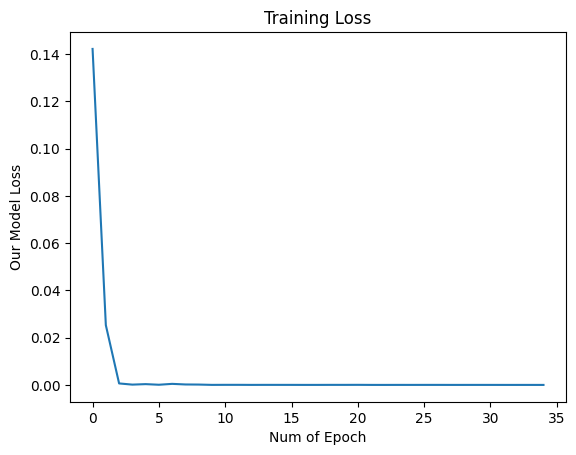

In [ ]:
# Plot in here
plt.plot(train_loss)
plt.xlabel('Num of Epoch')
plt.ylabel('Our Model Loss')
plt.title('Training Loss')
plt.show()

# Testing
After training, test your model on test dataset and compute performance metrics.

In [ ]:
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float().unsqueeze(1)

dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset, batch_size = 16, shuffle=True)

In [ ]:
# Implement Test in here

y_pred = []
model.eval()

with torch.no_grad():
    for data, label in test_loader:
        y_test_pred = model(data)
        y_pred_ = torch.round(y_test_pred)
        y_pred.append(y_pred_.detach().cpu().numpy().tolist())

y_test_pred = list(itertools.chain.from_iterable(y_pred))

Show confusion matrix of your model.

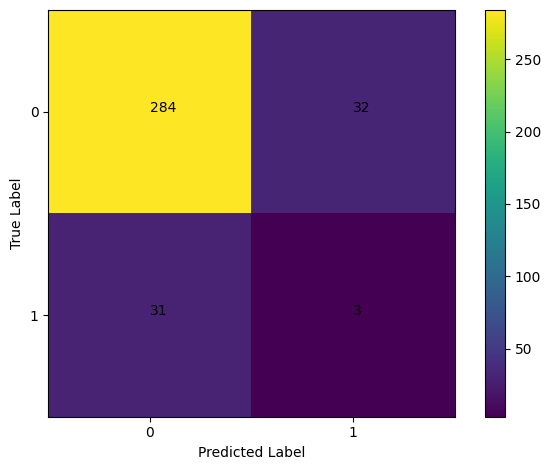

In [ ]:
# Print your confusion matrix here.

from sklearn.metrics import confusion_matrix

y_pred = np.array(y_test_pred)
y_test = y_test.numpy().squeeze()

confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['0', '1']

plt.imshow(confusion_matrix)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
y_pred[1:20].squeeze(), y_test[1:20]

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0.], dtype=float32))

In [ ]:
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_test, y_pred)*100
print(f"Our model accuracy is: {model_accuracy} %")

Our model accuracy is: 82.0 %
